This notebook is dedicated to understanding the data and precapre the input for the model according to the dataset and the desired putput.

---

## Visualization:

In [1]:
import scipy.io as sio 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2

In [2]:
data_path = '/Users/farida/Documents/subtract-model/clothing-co-parsing/'

segs = sio.loadmat(data_path + 'annotations/pixel-level/0001.mat')

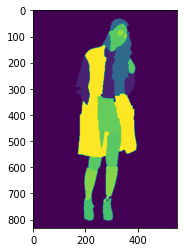

In [3]:
imgplot = plt.imshow(segs['groundtruth'])

In [4]:
print(segs)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Aug 19 15:20:27 2014', '__version__': '1.0', '__globals__': [], 'groundtruth': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


#### Load segmented images neglecting unndecessary information:
- '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Aug 19 15:20:27 2014',
- '__version__': '1.0', and
- '__globals__': [ ]

*Not for all images*

In [5]:
data_path = '/Users/farida/Documents/subtract-model/clothing-co-parsing/annotations/pixel-level/'
seg = []

for image in sorted(os.listdir(data_path)):
    if os.path.isfile(os.path.join(data_path, image)):
        data = sio.loadmat(data_path + image)
        seg.append(data['groundtruth'])


(836, 550)


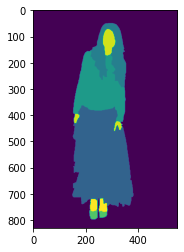

In [6]:
imgplot = plt.imshow(seg[1])
print(seg[100].shape)

**Check the output for one row in the above image:**

In [7]:
print(seg[1][100])
print(seg[1][100][300])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19

**From reading the `label_list` file, we find that:**
- '0' represents null.
- '19' represents hair.
- '41' represents skin.

#### Load raw images:

832
550
3
[[219 215 204]
 [220 216 205]
 [221 217 206]
 ...
 [ 53  44  37]
 [ 53  44  37]
 [ 52  43  36]]


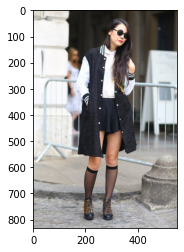

In [8]:
segs = mpimg.imread('/Users/farida/Documents/subtract-model/clothing-co-parsing/photos/0001.jpg')

print(len(segs))
print(len(segs[1]))
print(len(segs[1][1]))
print(segs[1])
plt.imshow(segs)

In [9]:
data_path = '/Users/farida/Documents/subtract-model/clothing-co-parsing/photos/'
raw = []

for image in sorted(os.listdir(data_path)):
    if os.path.join(data_path, image) != 0:
        raw.append(mpimg.imread(data_path+image))

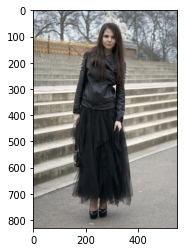

In [10]:
imgplot = plt.imshow(raw[1])

In [11]:
print(len(raw), len(seg))

2098 1004


#### Load annotations:

*For one image:*

In [12]:
d = sio.loadmat('/Users/farida/Documents/subtract-model/clothing-co-parsing/annotations/image-level/1005.mat')

print(d)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Aug 19 14:56:26 2014', '__version__': '1.0', '__globals__': [], 'tags': array([[ 0,  5,  9, 15, 19, 21, 41, 42, 47]], dtype=uint8)}


*For all images disregarding unnecessary information:*
- '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Aug 19 14:56:26 2014',
- '__version__': '1.0', and
- '__globals__': [ ].

In [13]:
data_path = '/Users/farida/Documents/subtract-model/clothing-co-parsing/annotations/image-level/'
seg_all = []

for image in os.listdir(data_path):
    if os.path.isfile(os.path.join(data_path + image)):
        seg_all.append(sio.loadmat(os.path.join(data_path + image))['tags'])

        
# Annotations for one image
print(seg_all[0])

[[ 0  2  7 13 19 27 41 47 57]]


#### Read the `label_list` file:

In [14]:
f = sio.loadmat('/Users/farida/Documents/subtract-model/clothing-co-parsing/label_list.mat')
print(f['label_list'].shape)
labels = []

for label in range(len(f['label_list'][0])):
    
    print('Code {}, is for {} '.format(label, f['label_list'][0][label]))
    labels.append(f['label_list'][0][label])


(1, 59)
Code 0, is for ['null'] 
Code 1, is for ['accessories'] 
Code 2, is for ['bag'] 
Code 3, is for ['belt'] 
Code 4, is for ['blazer'] 
Code 5, is for ['blouse'] 
Code 6, is for ['bodysuit'] 
Code 7, is for ['boots'] 
Code 8, is for ['bra'] 
Code 9, is for ['bracelet'] 
Code 10, is for ['cape'] 
Code 11, is for ['cardigan'] 
Code 12, is for ['clogs'] 
Code 13, is for ['coat'] 
Code 14, is for ['dress'] 
Code 15, is for ['earrings'] 
Code 16, is for ['flats'] 
Code 17, is for ['glasses'] 
Code 18, is for ['gloves'] 
Code 19, is for ['hair'] 
Code 20, is for ['hat'] 
Code 21, is for ['heels'] 
Code 22, is for ['hoodie'] 
Code 23, is for ['intimate'] 
Code 24, is for ['jacket'] 
Code 25, is for ['jeans'] 
Code 26, is for ['jumper'] 
Code 27, is for ['leggings'] 
Code 28, is for ['loafers'] 
Code 29, is for ['necklace'] 
Code 30, is for ['panties'] 
Code 31, is for ['pants'] 
Code 32, is for ['pumps'] 
Code 33, is for ['purse'] 
Code 34, is for ['ring'] 
Code 35, is for ['romper'] 
Co

### Data preperation:
Now that the dataset is visualized, I'll process the segmented images and save the parts needed in a separate folder.

**Classes that will be represented as 0:** ['null'], ['hair'], and ['skin'] have the codes 0, 20, and 42.

**Classes that will be represented as 1:** All clothing items and accessories. They have the remaining codes.

In [15]:
def convert_segmented_to_gray(segmented):
    "Convert a segmented image, RGB, to a gray-scale image of '1' for clothes and '0' for background and people."
    "Input: segmented image."
    "Output: image of 0's and 1's"
    
    dim1, dim2 = segmented.shape
    output = np.zeros((dim1,dim2))
    
    for raw in range(dim1):
        for pixel in range(dim2):
            
            check = not(segmented[raw][pixel] == 0 or segmented[raw][pixel] == 19 or segmented[raw][pixel] == 41)
            
            if check:
                output[raw][pixel] = 1
                
    return output

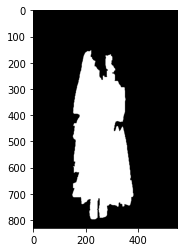

In [16]:
# Just to try

d = convert_segmented_to_gray(seg[1])
plt.imshow(d, cmap='gray')

In [17]:
Lables = []

for i in range(len(seg)):
    gray_image = convert_segmented_to_gray(seg[i])
    
    Lables.append(gray_image)

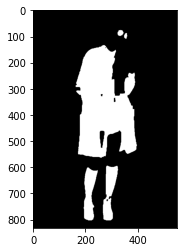

In [18]:
plt.imshow(Lables[0], cmap='gray')

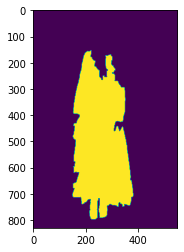

In [19]:
plt.imshow(Lables[1])